In [74]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

In [75]:
def tester(): # subtract, norm of each row, concat 2 1d arrays along axis
	a = np.array([[1,2,3],[4,5,6]])
	b = np.array([1,1,1])

	c = np.subtract(a,b)
	print(c)
	d = np.linalg.norm(c,axis=1)
	print(d)
	p = np.array( [[1],[3]] )
	q = np.array( [[9,8]] )
	r = np.concatenate( (p,q.T) ,axis=1 )
	print(r)

In [76]:
def g(arr1,point,bandwidth): # function to calculate the kernel value
	y = np.subtract(arr1,point)/bandwidth
	y = np.linalg.norm( y ,axis=1)
	y = np.square(y)
	y = np.exp(-y)
	return y
	
def g1(arr1,point,bandwidth): # calculates kernel value using multiprocessing
	y = np.subtract(arr1,point)/bandwidth
	y = np.linalg.norm( y ,axis=1)
	y = np.square(y)
	y = np.exp(-y)
	y=y.reshape(1,len(y))
	y = np.concatenate((y,y,y),axis=0).transpose()
	
	return y

In [77]:
def clusterImg(hr,hs,M,img):
	clusterCentroidR = []
	clusterCentroidS=[]
	pointsR = []
	pointsS = []
	distances = []

	clustersR = []
	clustersS = []

	for i in range(M):
		clustersR = np.zeros((M,1,3),dtype=float)
		clustersS = np.zeros((M,1,2),dtype=float)
	

	for i in range(M):
		tempX = random.randint(0,len(img)-1)
		tempY = random.randint(0,len(img[0])-1)
		tempArr = [tempX,tempY]
		clusterCentroidS.append(tempArr)
		clusterCentroidR.append(img[tempX][tempY])

	for i in range(len(img)):
		for j in range(len(img[i])):

			pointsS.append([i,j])
			pointsR.append(img[i][j])

	clusterCentroidR = np.array(clusterCentroidR)
	clusterCentroidS= np.array(clusterCentroidS)
	pointsR = np.array(pointsR)
	pointsS = np.array(pointsS)


	clusterIndices = []
	trials=100
	for trial in range(trials): # clustering iterations
		distances = []
		for i in range(M): # finding the hs and hr for each centroid against all other points
			pR = clusterCentroidR[i]
			pS = clusterCentroidS[i]
			hr = np.subtract(pointsR,pR)
			hr = np.linalg.norm(hr,axis=1)
			hs = np.subtract(pointsS,pS)
			hs = np.linalg.norm(hs,axis=1)

			hr = hr.reshape(len(hr),1)
			hs = hs.reshape(1,len(hs))


			hsAhr = np.concatenate( (hr,hs.T),axis=1)


			hsAhr = np.linalg.norm(hsAhr,axis=1) # taking the norm of the pair (hs,hr)



			distances.append(hsAhr)

		distances = np.array(distances) # holds the norm found above


		clusterIndices = np.argmin(distances,axis=0) # holds the cliusters each points belongs to



		newCentroidsR = []# storing the updated centroids. range
		newCentroidsS = []# stroing the update centroid spatial
		sizeClustersR = []
		sizeClustersS = []

		for i in range(M):
			newCentroidsR.append([0,0,0])
			newCentroidsS.append([0,0])
			sizeClustersR.append(0)
			sizeClustersS.append(0)

		newCentroidsR = np.array(newCentroidsR)
		newCentroidsS = np.array(newCentroidsS)
		countTemp=0
		
		for i in range(len(clusterIndices)):
			

			newCentroidsR[clusterIndices[i]] = np.add(pointsR[i],newCentroidsR[clusterIndices[i]])
			newCentroidsS[clusterIndices[i]] = np.add(pointsS[i],newCentroidsS[clusterIndices[i]])

			sizeClustersR[clusterIndices[i]]+=1
			sizeClustersS[clusterIndices[i]]+=1
		
		for i in range(len(newCentroidsR)):
			newCentroidsR[i] = newCentroidsR[i]/sizeClustersR[i]
			newCentroidsS[i] = newCentroidsS[i]/sizeClustersS[i]


		clusterCentroidR = newCentroidsR
		clusterCentroidS = newCentroidsS



	for i in range(len(pointsR)): # assigning the points the value of the centroid of the cluster it belongs to
		pointsR[i] = clusterCentroidR[clusterIndices[i]]


	pointsR = pointsR.astype(np.uint8)

	pointsR = pointsR.reshape(128,128,3)
	img = cv2.resize(pointsR,(128,128) )
	return img

	
		


In [78]:

img = cv2.imread("./Images/2.jpg")
img = cv2.resize(img, (512, 512))

cv2.imshow("Original",img)
img = cv2.resize(img, (128, 128))
imgOrignal = img

img = img.astype('float64')

img = np.array(img)
y = img
bandwidth = 40
iterations = 2

y = np.array(y)
y = y.reshape(-1,3)


newImg=[]
for i in range(len(y)): # update equation here
	for num in range(iterations):
		y[i] = np.sum(np.multiply(y,g1(y,y[i],bandwidth)),axis=0)  / np.sum(g(y,y[i],bandwidth))

	newImg.append(y[i])
	y = np.array(img)
	y = y.reshape(-1,3)


	if (float(i)/len(y))*100 - int((float(i)/len(y))*100) >= 0.99 and (float(i+1)/len(y))*100 - int((float(i+1)/len(y))*100) <0.99:

		print("Done ",int ((i/len(y))*100),"%")


newImg = np.array(newImg)


newImg = newImg.reshape(128,128,3)
newImgT = newImg.astype(np.uint8)



hr = 16
hs = 16
M = 40
segmentedImg = clusterImg(16,16,40,newImg)
img2 = newImg.astype(np.uint8)
img2 = cv2.resize(img2,(512	,512) )






Done  0 %
Done  1 %
Done  2 %
Done  3 %
Done  4 %
Done  5 %
Done  6 %
Done  7 %
Done  8 %
Done  9 %
Done  10 %
Done  11 %
Done  12 %
Done  13 %
Done  14 %
Done  15 %
Done  16 %
Done  17 %
Done  18 %
Done  19 %
Done  20 %
Done  21 %
Done  22 %
Done  23 %
Done  24 %
Done  25 %
Done  26 %
Done  27 %
Done  28 %
Done  29 %
Done  30 %
Done  31 %
Done  32 %
Done  33 %
Done  34 %
Done  35 %
Done  36 %
Done  37 %
Done  38 %
Done  39 %
Done  40 %
Done  41 %
Done  42 %
Done  43 %
Done  44 %
Done  45 %
Done  46 %
Done  47 %
Done  48 %
Done  49 %
Done  50 %
Done  51 %
Done  52 %
Done  53 %
Done  54 %
Done  55 %
Done  56 %
Done  57 %
Done  58 %
Done  59 %
Done  60 %
Done  61 %
Done  62 %
Done  63 %
Done  64 %
Done  65 %
Done  66 %
Done  67 %
Done  68 %
Done  69 %
Done  70 %
Done  71 %
Done  72 %
Done  73 %
Done  74 %
Done  75 %
Done  76 %
Done  77 %
Done  78 %
Done  79 %
Done  80 %
Done  81 %
Done  82 %
Done  83 %
Done  84 %
Done  85 %
Done  86 %
Done  87 %
Done  88 %
Done  89 %
Done  90 %
Done  91 

The Original Image


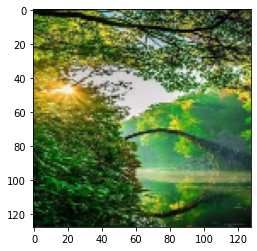

In [79]:
plt.imshow(cv2.cvtColor(imgOrignal, cv2.COLOR_BGR2RGB))
print("The Original Image")

The mean shifted filtered image with  Bandwidth = 40


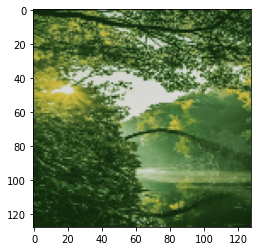

In [80]:
plt.imshow(cv2.cvtColor(newImgT, cv2.COLOR_BGR2RGB))
print("The mean shifted filtered image with ", "Bandwidth =",bandwidth)

The segmented image hr = 16 hs = 16 M = 40


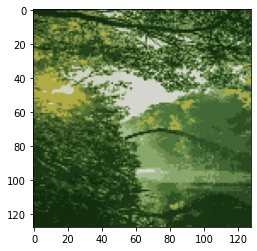

In [81]:
plt.imshow(cv2.cvtColor(segmentedImg, cv2.COLOR_BGR2RGB))
print("The segmented image","hr =",hr,"hs =",hs,"M =",M)